In [250]:
#EJEMPLO DE SISTEMA DE CONTROL DIFUSO 

#Objetivo: Desarrollar un sistema de control basado en lógica difusa que permita ajustar de 
#forma automática la velocidad de un ventilador en función de la temperatura de una máquina.


In [251]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzzy

In [252]:
#PASO 1: FUZIFICACIÓN

In [277]:
#Crear arreglo que contenga la totalidad de los puntos del universo

temperaturas = np.arange(-100,61, 1)
velocidades = np.arange(0,101, 1)

In [278]:
#Crear los conjuntos difusos para cada una de la variables
#con su respectivo grado de pertenencia

cold = fuzzy.trapmf(temperaturas, np.array([0,0,14,17]))
warm = fuzzy.trapmf(temperaturas, np.array([14,17,25,30]))
hot = fuzzy.trapmf(temperaturas, np.array([25,30,60,60]))

incrementarVel = fuzzy.trimf(velocidades, np.array([50,100,100]))
mantenerVel= fuzzy.trimf(velocidades, np.array([0,50,100]))
disminuirVel = fuzzy.trimf(velocidades, np.array([0,0,50]))

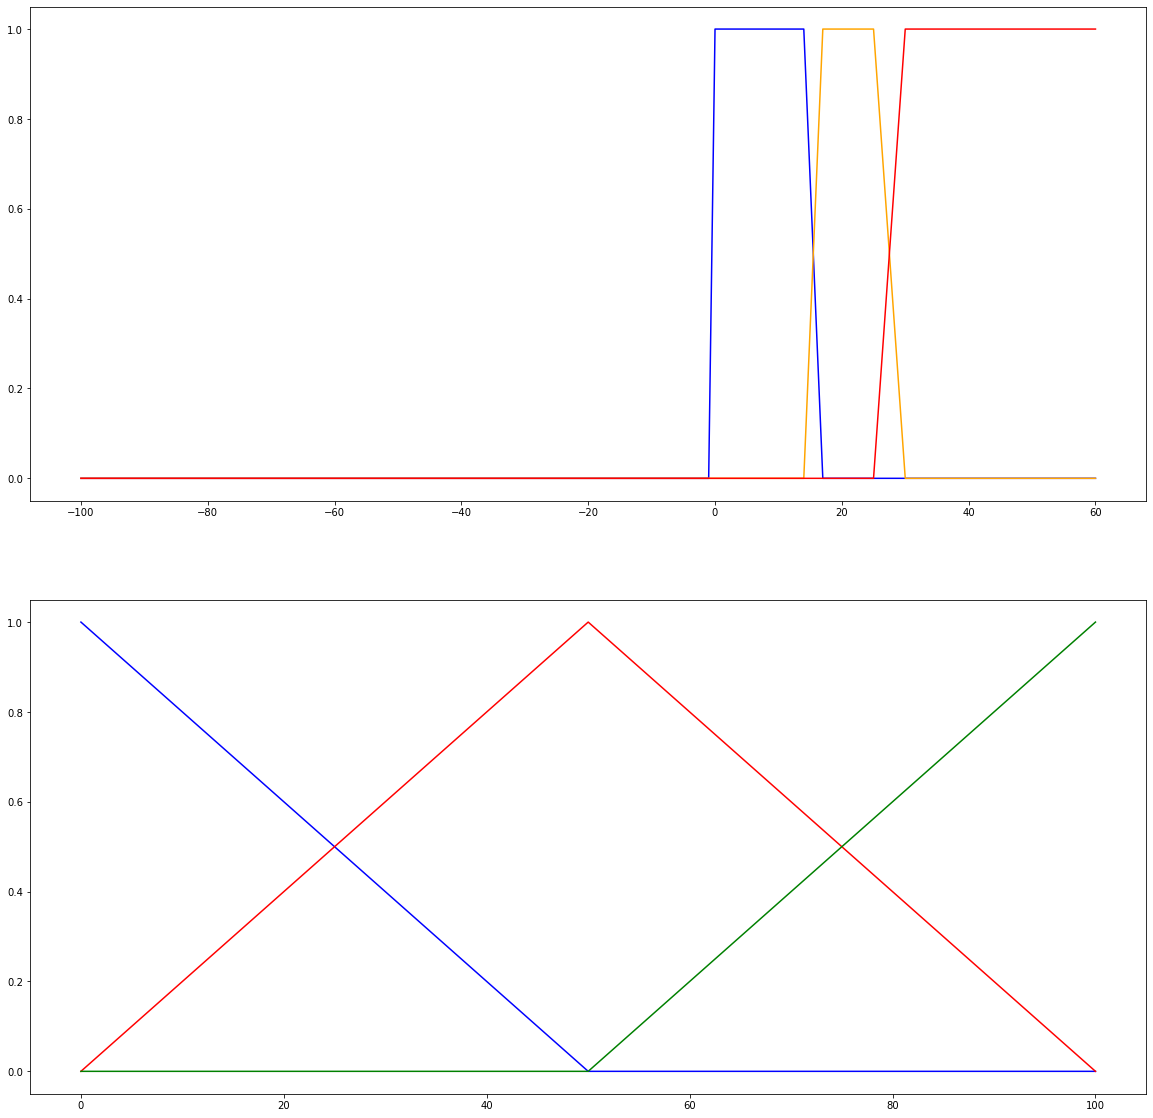

In [279]:
fig, (temps, vels) = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
temps.plot(temperaturas, cold, color="blue")
temps.plot(temperaturas, warm, color="orange")
temps.plot(temperaturas, hot, color="red")

vels.plot(velocidades,disminuirVel, color="blue" )
vels.plot(velocidades,mantenerVel, color="red" )
vels.plot(velocidades,incrementarVel, color="green" )

plt.show()

In [280]:
tempInicial = 30#14.3 #int(input("Ingrese el valor de la temperatura inicial"))

In [281]:
#Evaluar la temperatura para obtener sus diferentes valores de grados de pertenencia
gradoCold = fuzzy.interp_membership(temperaturas, cold, tempInicial)
gradoWarm = fuzzy.interp_membership(temperaturas, warm, tempInicial)
gradoHot = fuzzy.interp_membership(temperaturas, hot, tempInicial)

In [282]:
print(gradoCold)
print(gradoWarm)
print(gradoHot)

0.0
0.0
1.0


In [283]:
#PASO 2: INFERENCIA DIFUSA

In [284]:
# SI la temperatura es alta, ENTONCES la velocidad se incrementará
# SI la temperatura es normal, ENTONCES la velocidad se mantendrá
# SI la temperatura es baja, ENTONCES la velocidad se reducirá

In [285]:
print("Grado de pertenencia para 14.3 grados en el conjunto difuso Cold")
print(gradoCold)
print("")

print("Valores del conjunto difuso disminuir Velocidad")
print(disminuirVel)
print("")

gradoVelreducir = np.fmin(gradoCold, disminuirVel)

print("Valores del grado de pertenencia para el conjunto difuso disminuir Velocidad")
print(gradoVelreducir)
print("")


Grado de pertenencia para 14.3 grados en el conjunto difuso Cold
0.0

Valores del conjunto difuso disminuir Velocidad
[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18
 0.16 0.14 0.12 0.1  0.08 0.06 0.04 0.02 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]

Valores del grado de pertenencia para el conjunto difuso disminuir Velocidad
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

In [286]:
print("Grado de pertenencia para 14.3 grados en el conjunto difuso Warm")
print(gradoWarm)
print("")

print("Valores del conjunto difuso mantener Velocidad")
print(mantenerVel)
print("")

gradoVelmantener = np.fmin(gradoWarm, mantenerVel)

print("Valores del grado de pertenencia para el conjunto difuso msntener Velocidad")
print(gradoVelmantener)
print("")


Grado de pertenencia para 14.3 grados en el conjunto difuso Warm
0.0

Valores del conjunto difuso mantener Velocidad
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   0.98 0.96 0.94 0.92 0.9
 0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74 0.72 0.7  0.68 0.66 0.64 0.62
 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46 0.44 0.42 0.4  0.38 0.36 0.34
 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18 0.16 0.14 0.12 0.1  0.08 0.06
 0.04 0.02 0.  ]

Valores del grado de pertenencia para el conjunto difuso msntener Velocidad
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

In [287]:
print("Grado de pertenencia para 14.3 grados en el conjunto difuso Hot")
print(gradoHot)
print("")

print("Valores del conjunto difuso incrementar Velocidad")
print(incrementarVel)
print("")

gradoVelincrementar = np.fmin(gradoHot, incrementarVel)

print("Valores del grado de pertenencia para el conjunto difuso incrementar Velocidad")
print(gradoVelincrementar)
print("")


Grado de pertenencia para 14.3 grados en el conjunto difuso Hot
1.0

Valores del conjunto difuso incrementar Velocidad
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.06 0.08 0.1
 0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38
 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66
 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94
 0.96 0.98 1.  ]

Valores del grado de pertenencia para el conjunto difuso incrementar Velocidad
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.06 0.08 0.1
 0.12 0.14 0.16 0

In [288]:
####

# # Si la temperatura es alta y la presion es alta, la velocidad se incrementara

# gradoHot = 0.1
# gradoHighPressure = 0.4
# # gradoVelincrementar = operacionAnd(gradoHot, gradoHighPressure)
# gradoVelincrementar = np.fmin(gradoHot, gradoHighPressure)

In [289]:
# # Si la temperatura es normal O la presion es normal, la velocidad se mantendrá normal

# gradoWarm = 0.2
# gradoNormalPressure = 0.6

# gradoVelmantener= np.fmax(gradoWarm, gradoNormalPressure)
# gradoVelmantener

In [290]:
# # SI la temperatura es baja Y la presion es baja Y la velocidad del viento es baja ENTONCES la velocidad se reducirá
# gradoCold = 0.2
# gradoLowPressure= 0.1
# gradoslowWind = 0

# gradoVelreducir = np.fmin(gradoCold,np.fmin(gradoLowPressure,gradoslowWind))
# gradoVelreducir

In [291]:
# #SI la temperatura NO es alta entonces velocidad se mantendrá
# gradoHot = 0.3
# gradoVelmantener = 1 - gradoHot
# gradoVelmantener


In [292]:
#PASO 3: DEFUZIFICACIÓN

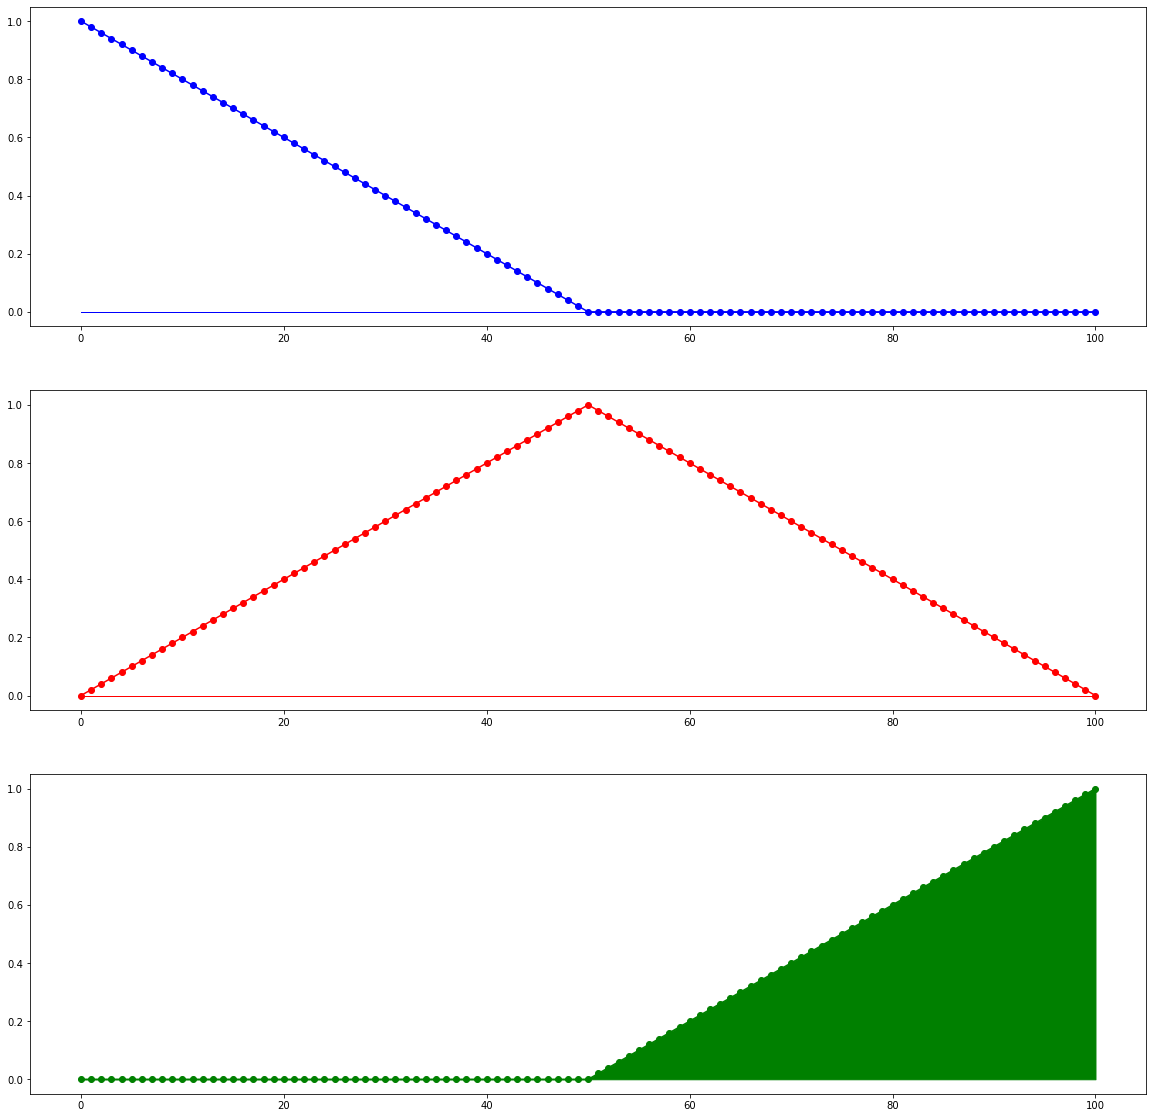

In [293]:
fig, (grafico1, grafico2, grafico3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

grafico1.plot(velocidades, disminuirVel, "-o", color="blue")
grafico1.fill_between(velocidades, gradoVelreducir, color="blue")

# grafico2.fill_between(velocidades, mascara, gradoVelmantener, color="green", label="Gráfica azul")
grafico2.plot(velocidades, mantenerVel, "-o", color = "red")
grafico2.fill_between(velocidades, gradoVelmantener, color="red")

# grafico3.fill_between(velocidades, mascara, gradoVelincrementar1, color="red", label="Gráfica azul")
grafico3.plot(velocidades, incrementarVel, "-o", color = "green")
grafico3.fill_between(velocidades, gradoVelincrementar, color="green")

plt.show()

In [294]:
#Operacion OR
resultadoFinal = np.fmax(gradoVelincrementar, np.fmax(gradoVelmantener,gradoVelreducir))
print(resultadoFinal)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.06 0.08 0.1
 0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38
 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66
 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94
 0.96 0.98 1.  ]


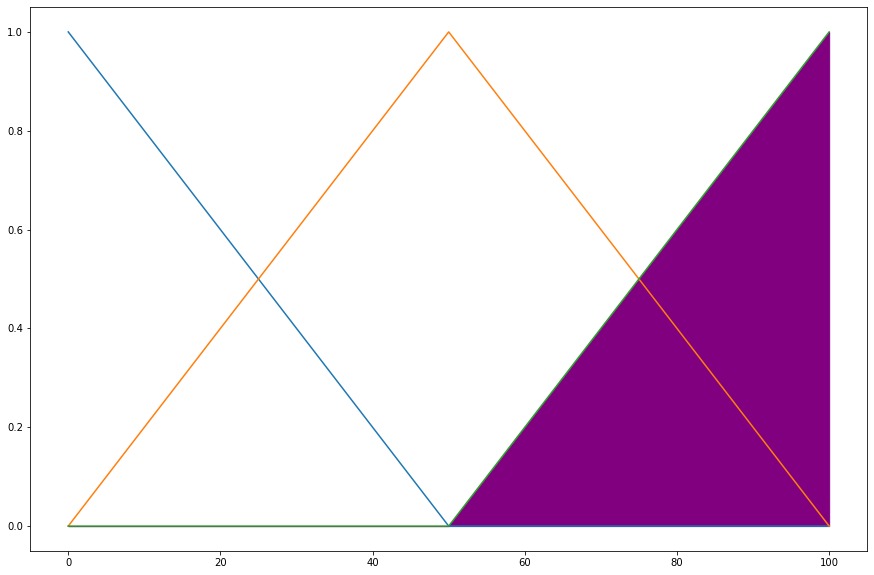

In [295]:
fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

graficoFinal.plot(velocidades, disminuirVel)
graficoFinal.plot(velocidades, mantenerVel)
graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")

# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")



plt.show()

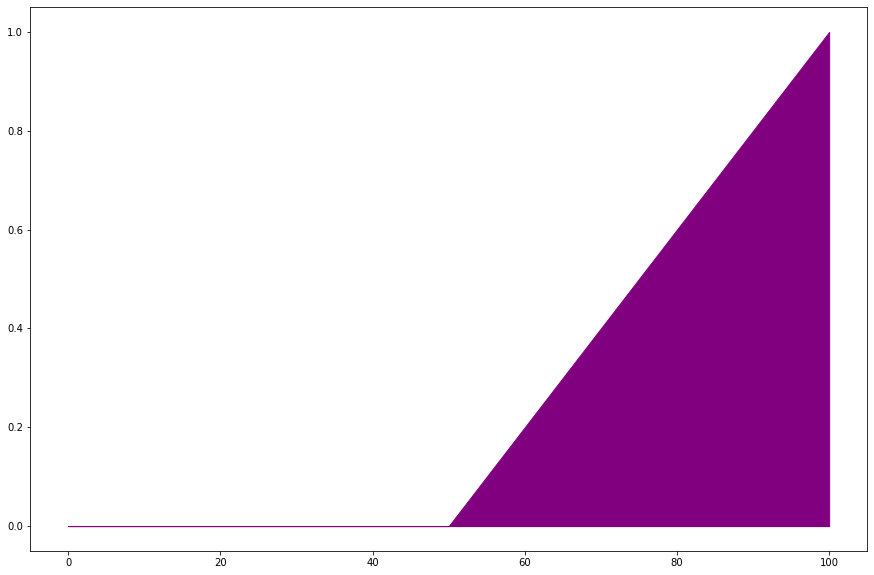

In [296]:
fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

# graficoFinal.plot(velocidades, disminuirVel)
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")

# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")



plt.show()

In [297]:
vel = fuzzy.defuzz(velocidades, resultadoFinal, 'centroid')
print(vel)

83.33333333333336


In [274]:
Controls which defuzzification method will be used. * ‘centroid’: Centroid of area * ‘bisector’: bisector of area * ‘mom’ : mean of maximum * ‘som’ : min of maximum * ‘lom’ : max of maximum

SyntaxError: invalid syntax (<ipython-input-274-bcbdfb7febb3>, line 1)

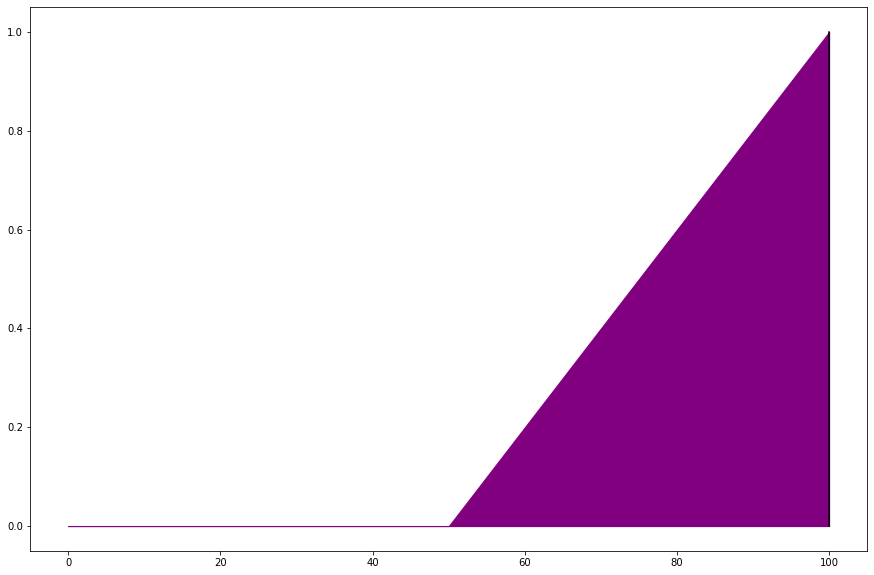

In [275]:
fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

# graficoFinal.plot(velocidades, disminuirVel)
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")


velEvaluada = fuzzy.interp_membership(velocidades, resultadoFinal, vel)

arregloSalidaX = [vel, vel]
arregloSalidaY = [0, velEvaluada]

graficoFinal.plot(arregloSalidaX, arregloSalidaY, color="black")
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")



plt.show()